# Business case study of India's leading fitness equipment brand 

### Importing necessary libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the CSV file and creating a dataframe

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### EXPLORATORY ANALYSIS

In [3]:
df.shape

(180, 9)

The dataframe has 180 rows and 9 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There is **no null values** in the dataset. The **product, gender, & marital status** columns are of **string** data type and the **rest of all columns** are **int** datatype. No columns need data type conversion. The data given looks already clean.

In [5]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Insights:**

  From this describe method we can find that,
  
+ The **KP281** model was sold approximately 40% in the overall sales,
+ The **median age** of the buyers is **26 years**,
+ **Male** customers bought **more than 50%** in the overall purchase,
+ The **median of education** is **16 years**,
+ **More than 50%** of the products were bought by **married** customers,
+ The **median of usage** is **3 times** per week,
+ The **median of fitness** level is **3** on a scale of 5,
+ The **median salary** of the customers is **50596.50$**,

Also we can find that some of the columns can be categorized for easy analysis.

### CATEGORIZATION:

<a id = 'age_cat'></a>
**Age_cat:**
The `Age` column ranges from **18** years to **50** years. It can be categorized as,

* 18 to 30 - young,
* 31 to 40 - mid_age,
* 40 to 50 - old

In [6]:
df['Age_cat'] = pd.cut(df['Age'], bins = [17, 30, 40, 50], labels = ['young', 'mid_age', 'old'])

<a id = 'edu_cat'></a>
**Edu_cat:**
The `Education` column ranges from **12** years to **21** years. It can be categorized as,

* 12 - Non_graduate,
* 13 to 16 - Graduate,
* 17 to 18 - Master,
* 19 to 21 - Doctorate

In [7]:
df['Edu_cat'] = pd.cut(df['Education'], bins = [0, 12, 16, 18, 21], labels = ['Non_graduate', 'Graduate', 'Master', 'Doctorate'])

<a id = 'usage_cat'></a>
**Usage_cat:**
The `Usage` column ranges from **2** times to **7** times per week. It can be categorized as,

* 2 to 3 - light_user,
* 4 to 5 - moderate_user,
* 6 to 7 - heavy_user

In [8]:
df['Usage_cat'] = pd.cut(df['Usage'], bins = [0, 3, 5, 7], labels = ['light_user', 'moderate_user', 'heavy_user'])

<a id = 'fitness_cat'></a>
**Fitness_cat:**
The `Fitness` column has level ranges from **1** to **5**. It can be categorized as,

* 1 to 2 - low,
* 3 - medium,
* 4 to 5 - high

In [9]:
df['Fitness_cat'] = pd.cut(df['Fitness'], bins = [0, 2, 3, 5], labels = ['low', 'medium', 'high'])

<a id = 'income_cat'></a>
**Income_cat:**
The `Income` column ranges from **29562** to **104581** USD. It can be categorized as,

* 29562 to 50000 - low,
* 50000 to 70000 - medium,
* 70000 to 104581 - high

In [10]:
df['Income_cat'] = pd.cut(df['Income'], bins = [0, 50000, 70000, 104581], labels = ['low', 'medium', 'high'])

In [11]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cat,Edu_cat,Usage_cat,Fitness_cat,Income_cat
0,KP281,18,Male,14,Single,3,4,29562,112,young,Graduate,light_user,high,low
1,KP281,19,Male,15,Single,2,3,31836,75,young,Graduate,light_user,medium,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,young,Graduate,moderate_user,medium,low
3,KP281,19,Male,12,Single,3,3,32973,85,young,Non_graduate,light_user,medium,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,young,Graduate,moderate_user,low,low


### VISUAL ANALYSIS

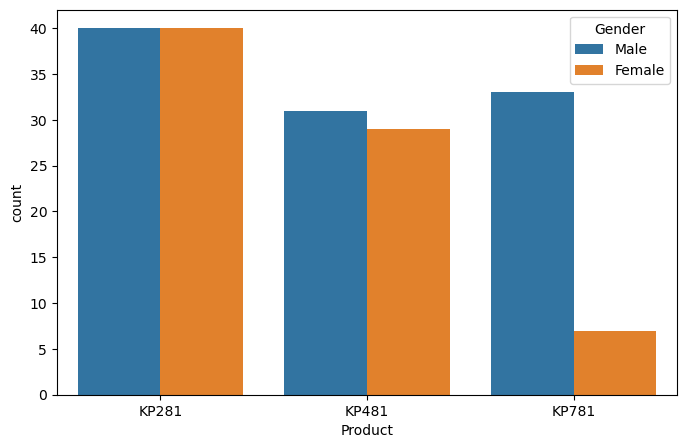

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data= df, x = 'Product', hue = 'Gender')
plt.show()

**Insights:**
* The KP281 model was the most sold model and the KP781 model was the least sold model.

**Detect Outliers:**

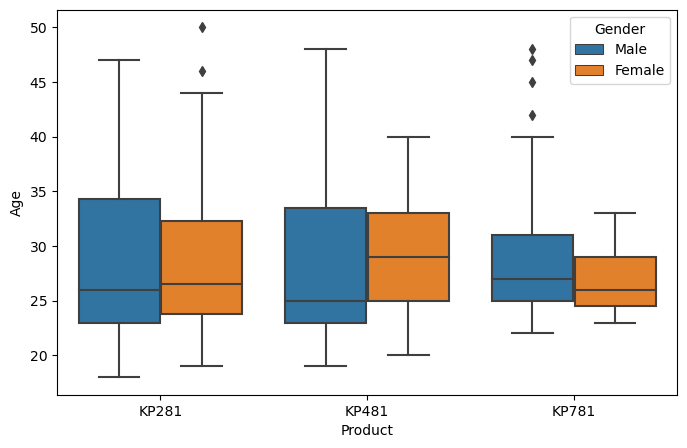

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data= df, x = 'Product', y='Age', hue = 'Gender')
plt.show()

**Insights:**

+ We have 2 outliers in the age column of the female customers who brought KP281 Model,
+ There are 4 outliers in the age of the male customers who brought KP781 Model,
+ Most of the users who bought KP281 and KP781 model has age less than 27 years.

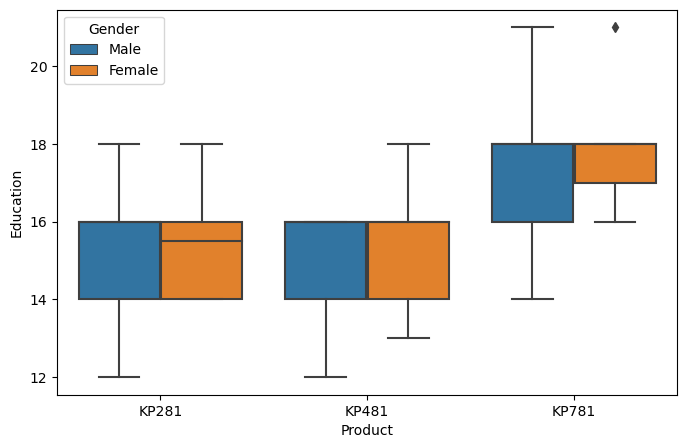

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data= df, x = 'Product', y='Education', hue = 'Gender')
plt.show()

**Insights:**

+ We have only 1 outlier in the education column of the female customers who brought KP781 Model,
+ The 50% of both male and female customers who brought the models KP281 and KP481 are having their education between 14 and 16 years,
+ The 50% of male customers and 75% of female customers who brought KP781 model are having their education between 16 and 18 years

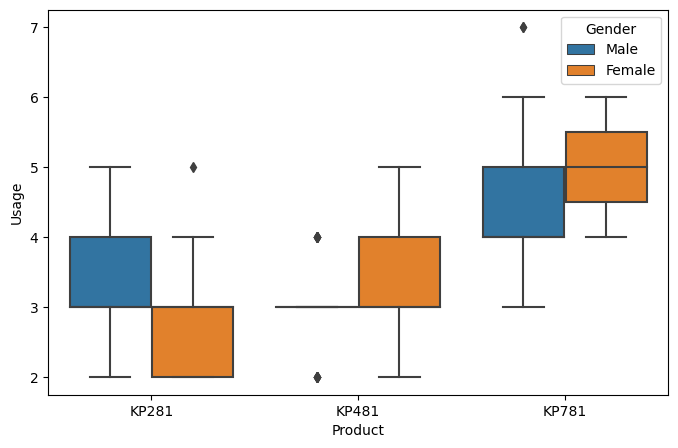

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data= df, x = 'Product', y='Usage', hue = 'Gender')
plt.show()

**Insights:**

+ We have 1 outlier in the usage column of the female customers who brought KP281 Model,
+ There are 2 outliers in the usage column of the male customers who brought KP481 Model,
+ There is 1 outlier in the usage column of the male customer who brought KP781 model

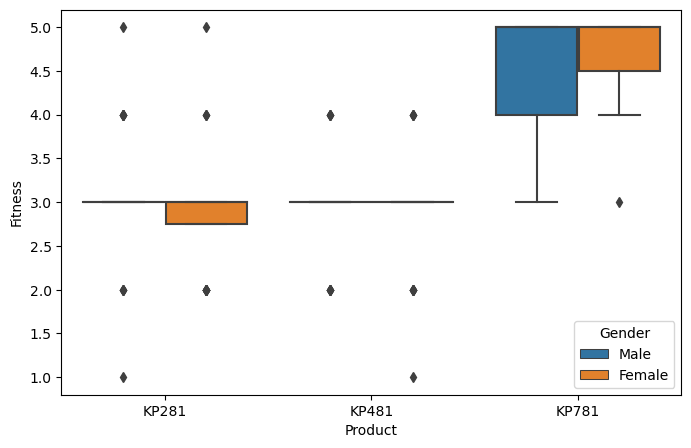

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data= df, x = 'Product', y='Fitness', hue = 'Gender')
plt.show()

**Insights:**

+ Most of the users who bought KP281 and KP481 model are in the fitness level 3,
+ Most of the users who bought KP781 model have fitness level between 4 and 5.

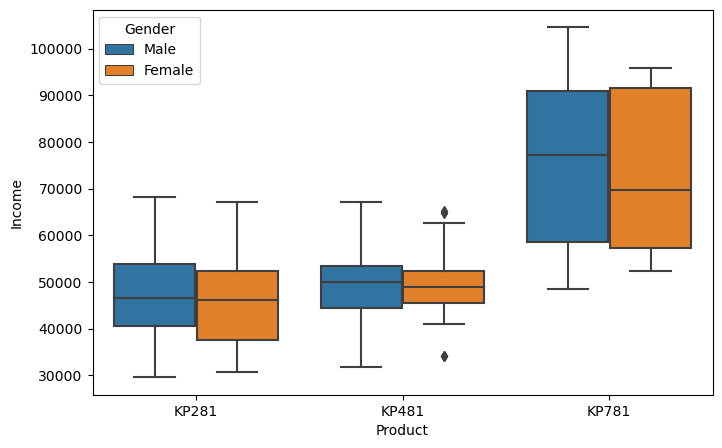

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data= df, x = 'Product', y='Income', hue = 'Gender')
plt.show()

**Insights:**

+ We have 2 outliers in the income column of the female customers who brought KP481 Model,
+ We can clearly see that more than 50% of the customers who bought the KP781 model has salary greater than the maximum salary of the customers who bought the other two models

**Check if features like marital status, age have any effect on the product purchased:**

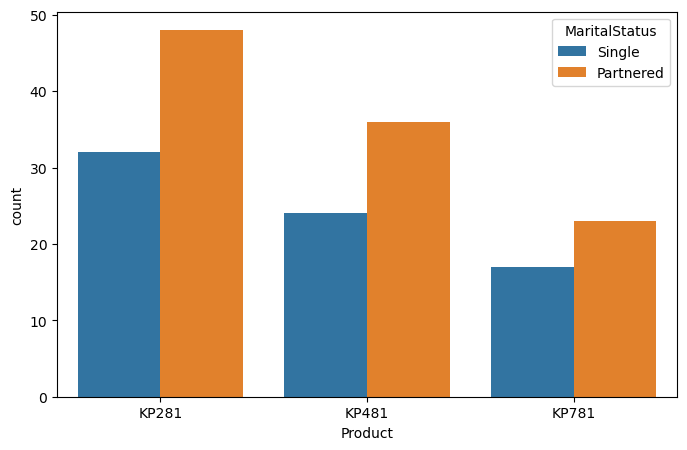

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data= df, x = 'Product', hue = 'MaritalStatus')
plt.show()

**Insights:**
* For all the models, Partnered customers buys more than the single customers

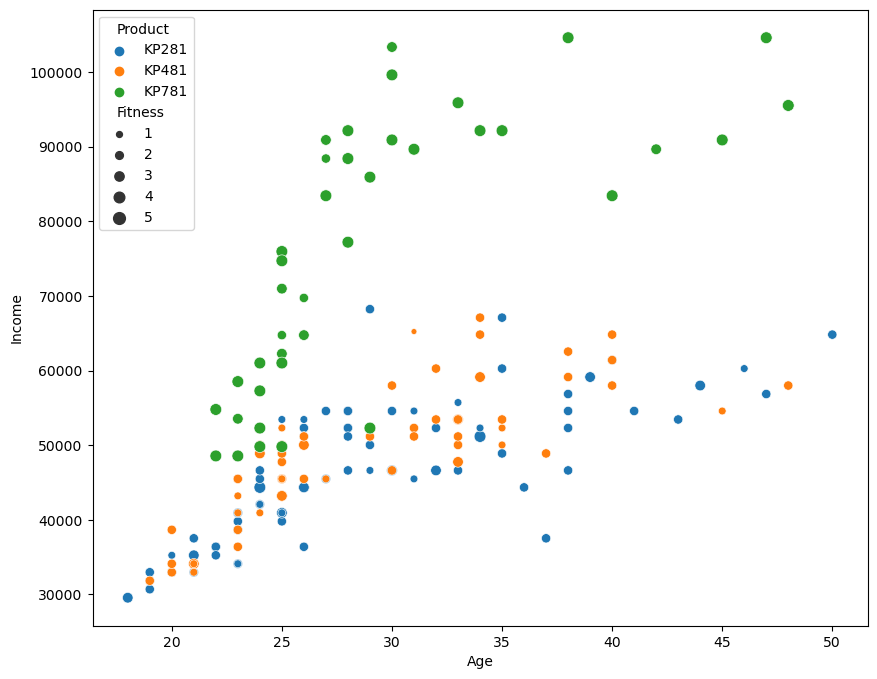

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data= df, x = 'Age', y='Income', hue = 'Product', size = 'Fitness')
plt.show()

**Insights:**

+ We can see that customers with **age** greater than **25** and **income** greater than **70000** and with **high fitness** level bought **KP781** model,
+ Customers with **age greater than 35** and **income lesser than 60000** has mostly bought **KP281** model

**Check correlation among different factors:**

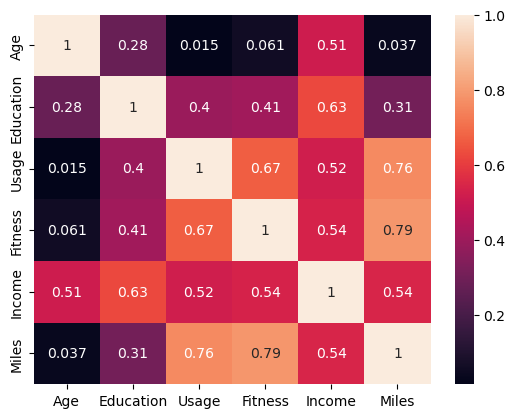

In [20]:
sns.heatmap(data = df.corr(), annot = True)
plt.show()

**Insights:**
* The usage & Income has high correlation, which means higher income customers uses the treadmill more,
* The usage & fitness also has high correlation,  which means customers with higher fitness level also uses the treadmill more

**Recommendations:**

Based on the visual analysis,
* We can recommend the KP781 model for the users with income greater than 70000 and high fitness level,
* We can recommend the KP481 model for the users with income between 50000 and 60000,
* We can recommend the KP281 model for the users with income lesser than 50000 and age greater than 35

### PROBABILITIES

**Marginal & Joint Probability:**

In [21]:
pd.crosstab(df['Product'], df['Gender'], normalize = 'all', margins = True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


**Insight:**
+ The probability of male purchasing a product is 0.57
+ The probability of purchasing KP281 is 0.44
+ The probability of a female purchasing KP281 is 0.22 and a male purchasing KP281 is also 0.22
+ The probability of a male purchasing KP481 is 0.17
+ The probability of a male purchasing KP781 is 0.18

In [22]:
pd.crosstab(df['Product'], df['MaritalStatus'], normalize = 'all', margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


**Insights:**
* The probability of a partnered customer purchasing any product is 0.59,
* The partnered customer has high probability of purchasing each product than the single customer

In [23]:
pd.crosstab(df['Product'], df['Income_cat'], normalize = 'all', margins = True)

Income_cat,low,medium,high,All
Product,,,,
KP281,0.266667,0.177778,0.000000,0.444444
KP481,0.166667,0.166667,0.000000,0.333333
KP781,0.027778,0.066667,0.127778,0.222222
All,0.461111,0.411111,0.127778,1.000000


**Insights:**
+ The probability of a customer in low income category to buy a product is high (P = 0.46)
+ The probability of a customer in high income category to buy KP281 or KP481 is 0 and KP781 is 0.12
+ The probability of a low income customer to buy KP281 is 0.26

Refer [Income_cat](#income_cat) for category.

In [24]:
pd.crosstab(df['Product'], df['Fitness_cat'], normalize = 'all', margins = True)

Fitness_cat,low,medium,high,All
Product,,,,
KP281,0.083333,0.300000,0.061111,0.444444
KP481,0.072222,0.216667,0.044444,0.333333
KP781,0.000000,0.022222,0.200000,0.222222
All,0.155556,0.538889,0.305556,1.000000


**Insights:**
+ The probability of a customer with medium level of fitness to buy any product is 0.53 and with low level of fitness to buy any product is 0.15,
+ The probability of a customer with medium level of fitness to buy KP281 is 0.30
+ The probability of a customer with medium level of fitness to buy KP481 is 0.21
+ The probability of a customer with high level of fitness to buy KP781 is 0.20

Refer [Fitness_cat](#fitness_cat) for category.

**Conditional Probability:**

In [25]:
pd.crosstab(df['Product'], df['Gender'], normalize = 'columns', margins = True)

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


**Insight:**
+ The probability of a customer to buy KP281 given the customer is female is 0.52
+ The probability of a customer to buy KP481 given the customer is female is 0.38
+ The probability of a customer to buy KP781 given the customer is male is 0.31

In [26]:
pd.crosstab(df['Product'], df['MaritalStatus'], normalize = 'columns', margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


**Insights:**
* For each model, the probability of a partnered customer to buy that product has almost equal probability as Single customer 

In [27]:
pd.crosstab(df['Product'], df['Income_cat'], normalize = 'columns', margins = True)

Income_cat,low,medium,high,All
Product,,,,
KP281,0.578313,0.432432,0.0,0.444444
KP481,0.361446,0.405405,0.0,0.333333
KP781,0.060241,0.162162,1.0,0.222222


**Insights:**
+ The probability of a customer to buy KP281 given the customer is in low income category is 0.57
+ The probability of a customer to buy KP481 given the customer is in medium income category is 0.40
+ The probability of a customer to buy KP781 given the customer is in high income category is 1, which means all the customers with high income has bought only the KP781 model.

Refer [Income_cat](#income_cat) for category.

In [28]:
pd.crosstab(df['Product'], df['Fitness_cat'], normalize = 'columns', margins = True)

Fitness_cat,low,medium,high,All
Product,,,,
KP281,0.535714,0.556701,0.200000,0.444444
KP481,0.464286,0.402062,0.145455,0.333333
KP781,0.000000,0.041237,0.654545,0.222222


**Insights:**
+ The probability of a customer to buy KP281 given the customer has medium fitness level is 0.55
+ The probability of a customer to buy KP481 given the customer has low fitness level is 0.46
+ The probability of a customer to buy KP781 given the customer has high fitness level is 0.65

Refer [Fitness_cat](#fitness_cat) for category.

### SUMMARY:

### Insights:

+ The KP281 model was sold approximately 40% in the overall sales,
+ The median age of the buyers is 26 years,
+ Male customers bought more than 50% in the overall purchase,
+ More than 50% of the products were bought by married customers,
+ The median salary of the customers is 50596.50,
+ The KP281 model was the most sold model and the KP781 model was the least sold model,
+ Most of the users who bought KP281 and KP781 model was of age less than 27 years,
+ The 50% of both male and female customers who bought the models KP281 and KP481 are having their education between 14 and 16 years,
+ The 50% of male customers and 75% of female customers who bought KP781 model are having their education between 16 and 18 years,
+ Most of the users who bought KP281 and KP481 model are in the fitness level 3,
+ Most of the users who bought KP781 model have fitness level between 4 and 5,
+ More than 50% of the customers who bought the KP781 model has salary greater than the maximum salary of the customers who bought the other two models,
+ For all the models, Partnered customers buys more than the single customers,
+ We can see that customers with age greater than 25 and income greater than 70000 and with high fitness level bought KP781 model,
+ Customers with age greater than 35 and income lesser than 60000 has mostly bought KP281 model,
+ The usage & Income has high correlation, which means higher income customers uses the treadmill more,
+ The usage & fitness also has high correlation, which means customers with higher fitness level also uses the treadmill more,

All the above statements can be supported by the following probabilities,
- The probability of male purchasing a product is 0.57
- The probability of purchasing KP281 is 0.44
- The probability of a female purchasing KP281 is 0.22 and a male purchasing KP281 is also 0.22
- The probability of a male purchasing KP481 is 0.17
- The probability of a male purchasing KP781 is 0.18
- The probability of a partnered customer purchasing any product is 0.59,
- The partnered customer has high probability of purchasing each product than the single customer
- The probability of a customer in low income category to buy a product is high (P = 0.46)
- The probability of a customer in high income category to buy KP281 or KP481 is 0 and KP781 is 0.12
- The probability of a low income customer to buy KP281 is 0.26
- The probability of a customer with medium level of fitness to buy any product is 0.53 and with low level of fitness to buy any product is 0.15,
- The probability of a customer with medium level of fitness to buy KP281 is 0.30
- The probability of a customer with medium level of fitness to buy KP481 is 0.21
- The probability of a customer with high level of fitness to buy KP781 is 0.20
- The probability of a customer to buy KP281 given the customer is female is 0.52
- The probability of a customer to buy KP481 given the customer is female is 0.38
- The probability of a customer to buy KP781 given the customer is male is 0.31
- For each model, the probability of a partnered customer to buy that product has almost equal probability as Single customer
- The probability of a customer to buy KP281 given the customer is in low income category is 0.57
- The probability of a customer to buy KP481 given the customer is in medium income category is 0.40
- The probability of a customer to buy KP781 given the customer is in high income category is 1, which means all the customers with high income has bought only the KP781 model.
- The probability of a customer to buy KP281 given the customer has medium fitness level is 0.55
- The probability of a customer to buy KP481 given the customer has low fitness level is 0.46
- The probability of a customer to buy KP781 given the customer has high fitness level is 0.65


### Recommendation:

Based on the insights, we can profile our customers into 3 categories for 3 products.

***Category-1 (Basic)***

**Product**             : KP281 <br>
**Age**                 : Less than 30 <br>
**Gender**              : Female <br>
**Education**           : 12 to 16 years <br>
**Marital Status**      : Partnered <br>
**Fitness**             : 3 on a scale of 5 <br>
**Income**              : Less than 50,000 USD <br>


***Category-2 (Budget)***

**Product**             : KP481 <br>
**Age**                 : Less than 35 <br>
**Gender**              : Female <br>
**Education**           : 14 to 16 years <br>
**Marital Status**      : Partnered <br>
**Fitness**             : less than 3 on a scale 5 <br>
**Income**              : 50,000 USD to 70,000 USD <br>


***Category-3 (Premium)***

**Product**             : KP781 <br>
**Age**                 : Less than 30 <br>
**Gender**              : Male <br>
**Education**           : Greater than 16 years <br>
**Marital Status**      : Partnered <br>
**Fitness**             : Greater than 3 on a scale of 5 <br>
**Income**              : Greater than 70,000 USD <br>

It is recommended that the marketing team would give preferences based on these categories for the target customers.

________________________________________________________________________________________________________________________________

<H1 style="font-size:30px">
<p style="text-align: center;">
        <b>
        THANK YOU !
            </P>
    <H1>
    